In [4]:
import os
import pandas as pd
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [41]:
df = pd.read_csv("../../data/cleaned_jetblue_df.csv")

df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,a291a2b5ac19223c3407cfec58d1fc24,2022-04-16,2022-04-17,ATL,CLT,VH0AUEL1,PT8H48M,0,False,False,...,1650216180||1650238380,2022-04-17T13:23:00.000-04:00||2022-04-17T19:3...,BOS||CLT,ATL||BOS,JetBlue Airways||JetBlue Airways,B6||B6,||Embraer 190,9480||8880,947||728,coach||coach
1,d53bcf9e8b6523fa2de9420d7cb22196,2022-04-16,2022-04-17,ATL,DTW,RH0AUEL1,PT5H8M,0,False,False,...,1650244380||1650254280,2022-04-17T21:13:00.000-04:00||2022-04-17T23:5...,JFK||DTW,ATL||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Embraer 190||Embraer 190,8580||7680,762||485,coach||coach
2,5bb138f39804320ece767e747608a50e,2022-04-16,2022-04-17,ATL,EWR,VC0QBEL1,PT2H9M,0,False,False,...,1650202740,2022-04-17T09:39:00.000-04:00,EWR,ATL,JetBlue Airways,B6,Embraer 190,7740,762,coach
3,8201f75d221c7aa5b78f3b7781166032,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H15M,0,False,False,...,1650208500,2022-04-17T11:15:00.000-04:00,JFK,ATL,JetBlue Airways,B6,Airbus A320,8100,762,coach
4,a63591f2b4df39d809c4a45a3898e122,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H23M,0,False,False,...,1650244380,2022-04-17T21:13:00.000-04:00,JFK,ATL,JetBlue Airways,B6,Embraer 190,8580,762,coach


In [42]:
sorted(df.columns)

['baseFare',
 'destinationAirport',
 'elapsedDays',
 'fareBasisCode',
 'flightDate',
 'isBasicEconomy',
 'isNonStop',
 'isRefundable',
 'legId',
 'searchDate',
 'seatsRemaining',
 'segmentsAirlineCode',
 'segmentsAirlineName',
 'segmentsArrivalAirportCode',
 'segmentsArrivalTimeEpochSeconds',
 'segmentsArrivalTimeRaw',
 'segmentsCabinCode',
 'segmentsDepartureAirportCode',
 'segmentsDepartureTimeEpochSeconds',
 'segmentsDepartureTimeRaw',
 'segmentsDistance',
 'segmentsDurationInSeconds',
 'segmentsEquipmentDescription',
 'startingAirport',
 'totalFare',
 'totalTravelDistance',
 'travelDuration']

In [43]:
["startingAirport", "destinationAirport"]

['startingAirport', 'destinationAirport']

In [48]:
## Groups the routes by start, destination, and count of the pairing. 
num_of_distinct_routes_df = df.groupby(["startingAirport", "destinationAirport"]).size().reset_index(name="count")

## Sorts out the information
sorted_distinct_route_df = num_of_distinct_routes_df.sort_values(by="count", ascending=False)

sorted_distinct_route_df.isnull().any()



## Feature engineering unique plotting label
sorted_distinct_route_df["Route"] = sorted_distinct_route_df["startingAirport"] + "-" + sorted_distinct_route_df["destinationAirport"]

sorted_distinct_route_df

,startingAirport,destinationAirport,count,Route
93,JFK,LAX,144944,JFK-LAX
103,LAX,JFK,135097,LAX-JFK
117,LGA,ORD,129404,LGA-ORD
121,MIA,BOS,129401,MIA-BOS
99,LAX,BOS,125326,LAX-BOS
...,...,...,...,...
48,DEN,ORD,301,DEN-ORD
29,CLT,DFW,21,CLT-DFW
59,DFW,OAK,18,DFW-OAK
133,OAK,DFW,16,OAK-DFW


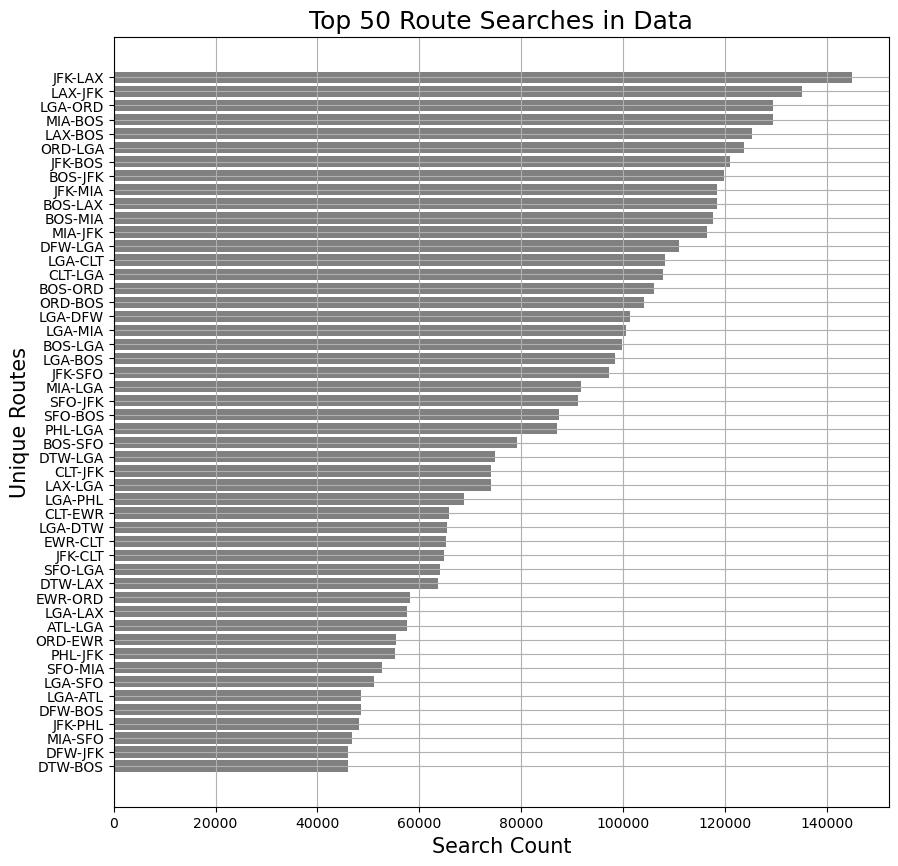

In [91]:
plt.figure(figsize=(10,10))

plt.gca().invert_yaxis()
plt.barh(sorted_distinct_route_df["Route"].head(50), sorted_distinct_route_df["count"].head(50), color="gray")

plt.title("Top 50 Route Searches in Data", size=18)
plt.ylabel("Unique Routes", size=15)
plt.xlabel("Search Count", size=15)
plt.grid(which="major")

# plt.show();